In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 

In [2]:
from keras.datasets import mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 

11490434/11490434 [==============================] - 0s 0us/step


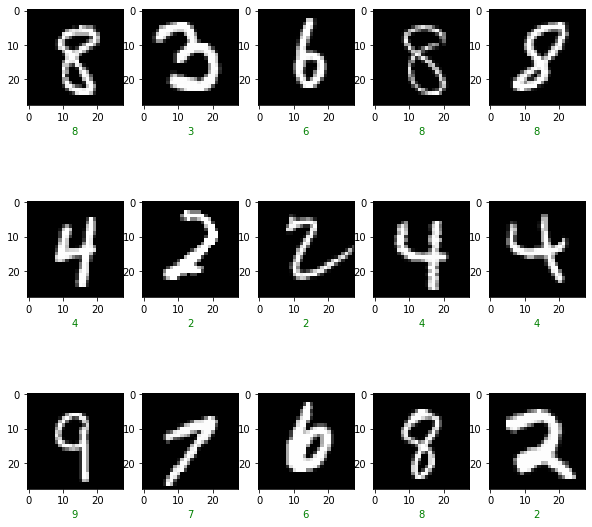

In [4]:
fig = plt.figure(figsize=(10, 10)) 
for i in range(1, 16): 
  rn = np.random.randint(60000) 
  fig.add_subplot(3, 5, i) 
  plt.imshow(X_train[rn], cmap='gray') 
  plt.xlabel(Y_train[rn], color='g') 
plt.show()

In [6]:
img_rows, img_cols = 28, 28

In [7]:
from keras import backend as k 
if k.image_data_format()=='channels_first':
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols) 
  input_shape = (1, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) 
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1) 
  input_shape = (img_rows, img_cols, 1) 

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255 
X_test /= 255 

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

60000 train samples
10000 test samples


In [10]:
print(np.unique(Y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [12]:
num_classes=10 
import keras
Y_train = keras.utils.to_categorical(Y_train, num_classes) 
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [13]:
def build_model(o): 

  model = Sequential() 

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 

  model.add(MaxPooling2D(pool_size=(2, 2))) 

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu')) 

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Dropout(0.25)) 

  model.add(Flatten()) 

  model.add(Dense(256, activation='sigmoid')) 

  model.add(Dropout(0.5)) 

  model.add(Dense(num_classes, activation='softmax')) 

  if o=='sgd':
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['accuracy']) 
  elif o=='adadelta':
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adadelta', metrics=['accuracy'])
  elif o=='adagrad':
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adagrad', metrics=['accuracy']) 
  elif o=='adam':
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
  elif o=='rmsprop':
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='rmsprop', metrics=['accuracy']) 
  
  model.summary() 

  return model

# **SGD**

In [14]:
model_sgd = build_model('sgd') 
model_log_sgd = model_sgd.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, Y_test)) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0

In [15]:
scores_sgd = model_sgd.evaluate(X_test, Y_test, verbose=0) 
print('SGD TEST LOSS:', scores_sgd[0]) 
print('SGD TEST ACCURACY:', scores_sgd[1])

SGD TEST LOSS: 0.1233583465218544
SGD TEST ACCURACY: 0.9628000259399414


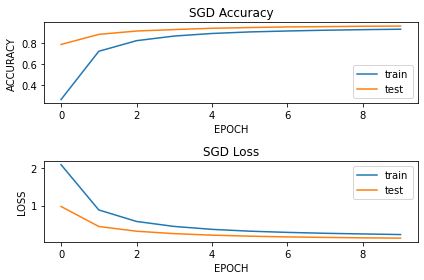

In [17]:
fig = plt.figure() 

plt.subplot(2, 1, 1) 
plt.plot(model_log_sgd.history['accuracy']) 
plt.plot(model_log_sgd.history['val_accuracy']) 
plt.title("SGD Accuracy") 
plt.xlabel("EPOCH") 
plt.ylabel("ACCURACY") 
plt.legend(['train', 'test'], loc='best') 

plt.subplot(2, 1, 2) 
plt.plot(model_log_sgd.history['loss']) 
plt.plot(model_log_sgd.history['val_loss']) 
plt.title("SGD Loss") 
plt.xlabel("EPOCH") 
plt.ylabel("LOSS") 
plt.legend(['train', 'test'], loc='best') 

plt.tight_layout()

# **ADADELTA**

In [18]:
model_adadelta = build_model('adadelta') 
model_log_adadelta = model_adadelta.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, Y_test)) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 800)              

In [19]:
scores_adadelta = model_adadelta.evaluate(X_test, Y_test, verbose=0) 
print('ADA DELTA TEST LOSS:', scores_adadelta[0]) 
print('ADA DELTA TEST ACCURACY:', scores_adadelta[1])

ADA DELTA TEST LOSS: 2.239699125289917
ADA DELTA TEST ACCURACY: 0.4300000071525574


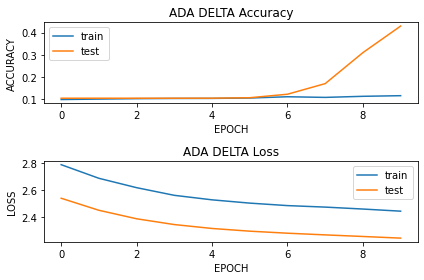

In [20]:
fig = plt.figure() 

plt.subplot(2, 1, 1) 
plt.plot(model_log_adadelta.history['accuracy']) 
plt.plot(model_log_adadelta.history['val_accuracy']) 
plt.title("ADA DELTA Accuracy") 
plt.xlabel("EPOCH") 
plt.ylabel("ACCURACY") 
plt.legend(['train', 'test'], loc='best') 

plt.subplot(2, 1, 2) 
plt.plot(model_log_adadelta.history['loss']) 
plt.plot(model_log_adadelta.history['val_loss']) 
plt.title("ADA DELTA Loss") 
plt.xlabel("EPOCH") 
plt.ylabel("LOSS") 
plt.legend(['train', 'test'], loc='best') 

plt.tight_layout()

# **ADAGRAD**

In [21]:
model_adagrad = build_model('adagrad') 
model_log_adagrad = model_adagrad.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, Y_test)) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 800)              

In [22]:
scores_adagrad = model_adagrad.evaluate(X_test, Y_test, verbose=0) 
print('ADAGRAD TEST LOSS:', scores_adagrad[0]) 
print('ADAGRAD TEST ACCURACY:', scores_adagrad[1])

ADAGRAD TEST LOSS: 0.49538448452949524
ADAGRAD TEST ACCURACY: 0.8718000054359436


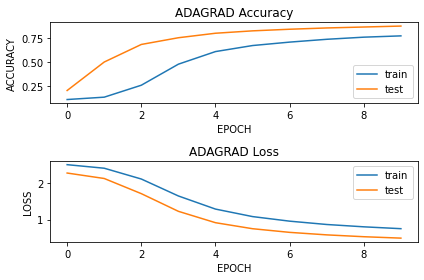

In [23]:
fig = plt.figure() 

plt.subplot(2, 1, 1) 
plt.plot(model_log_adagrad.history['accuracy']) 
plt.plot(model_log_adagrad.history['val_accuracy']) 
plt.title("ADAGRAD Accuracy") 
plt.xlabel("EPOCH") 
plt.ylabel("ACCURACY") 
plt.legend(['train', 'test'], loc='best') 

plt.subplot(2, 1, 2) 
plt.plot(model_log_adagrad.history['loss']) 
plt.plot(model_log_adagrad.history['val_loss']) 
plt.title("ADAGRAD Loss") 
plt.xlabel("EPOCH") 
plt.ylabel("LOSS") 
plt.legend(['train', 'test'], loc='best') 

plt.tight_layout()

# **ADAM**

In [24]:
model_adam = build_model('adam') 
model_log_adam = model_adam.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, Y_test)) 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 flatten_3 (Flatten)         (None, 800)              

In [25]:
scores_adam = model_adam.evaluate(X_test, Y_test, verbose=0) 
print('ADAM TEST LOSS:', scores_adam[0]) 
print('ADAM TEST ACCURACY:', scores_adam[1])

ADAM TEST LOSS: 0.02670994959771633
ADAM TEST ACCURACY: 0.9902999997138977


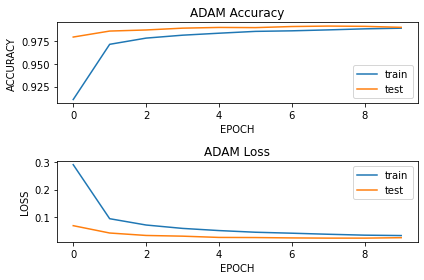

In [26]:
fig = plt.figure() 

plt.subplot(2, 1, 1) 
plt.plot(model_log_adam.history['accuracy']) 
plt.plot(model_log_adam.history['val_accuracy']) 
plt.title("ADAM Accuracy") 
plt.xlabel("EPOCH") 
plt.ylabel("ACCURACY") 
plt.legend(['train', 'test'], loc='best') 

plt.subplot(2, 1, 2) 
plt.plot(model_log_adam.history['loss']) 
plt.plot(model_log_adam.history['val_loss']) 
plt.title("ADAM Loss") 
plt.xlabel("EPOCH") 
plt.ylabel("LOSS") 
plt.legend(['train', 'test'], loc='best') 

plt.tight_layout()

# **RMS PROP**

In [27]:
model_rms = build_model('rmsprop') 
model_log_rms = model_rms.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, Y_test)) 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 flatten_4 (Flatten)         (None, 800)              

In [28]:
scores_rms = model_rms.evaluate(X_test, Y_test, verbose=0) 
print('RMS TEST LOSS:', scores_rms[0]) 
print('RMS TEST ACCURACY:', scores_rms[1])

RMS TEST LOSS: 0.031372182071208954
RMS TEST ACCURACY: 0.989300012588501


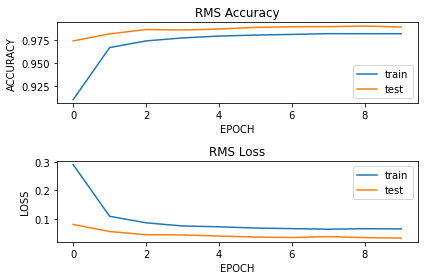

In [29]:
fig = plt.figure() 

plt.subplot(2, 1, 1) 
plt.plot(model_log_rms.history['accuracy']) 
plt.plot(model_log_rms.history['val_accuracy']) 
plt.title("RMS Accuracy") 
plt.xlabel("EPOCH") 
plt.ylabel("ACCURACY") 
plt.legend(['train', 'test'], loc='best') 

plt.subplot(2, 1, 2) 
plt.plot(model_log_rms.history['loss']) 
plt.plot(model_log_rms.history['val_loss']) 
plt.title("RMS Loss") 
plt.xlabel("EPOCH") 
plt.ylabel("LOSS") 
plt.legend(['train', 'test'], loc='best') 

plt.tight_layout()

# **COMPARISON**

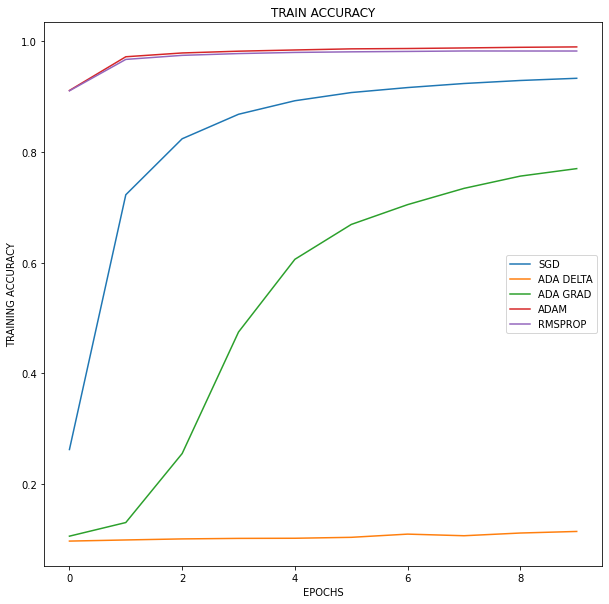

In [31]:
plt.figure(figsize=(10, 10))
plt.plot(model_log_sgd.history['accuracy']) 
plt.plot(model_log_adadelta.history['accuracy']) 
plt.plot(model_log_adagrad.history['accuracy']) 
plt.plot(model_log_adam.history['accuracy']) 
plt.plot(model_log_rms.history['accuracy'])  
plt.title("TRAIN ACCURACY") 
plt.xlabel("EPOCHS") 
plt.ylabel("TRAINING ACCURACY") 
plt.legend(['SGD', 'ADA DELTA', 'ADA GRAD', 'ADAM', 'RMSPROP'], loc='best')


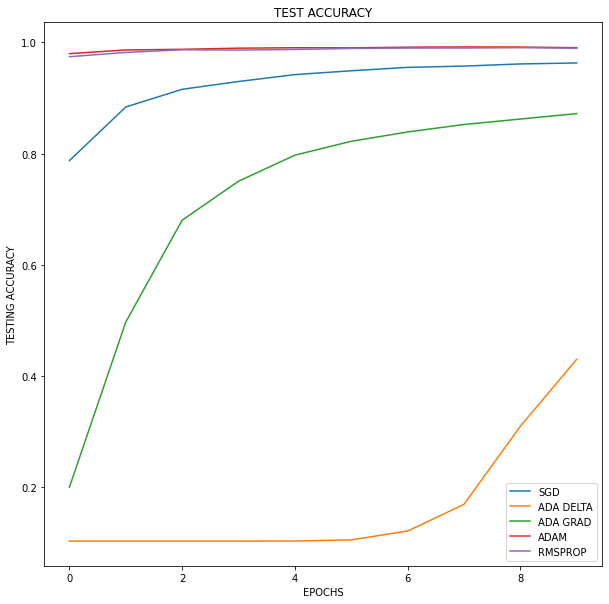

In [32]:
plt.figure(figsize=(10, 10))
plt.plot(model_log_sgd.history['val_accuracy']) 
plt.plot(model_log_adadelta.history['val_accuracy']) 
plt.plot(model_log_adagrad.history['val_accuracy']) 
plt.plot(model_log_adam.history['val_accuracy']) 
plt.plot(model_log_rms.history['val_accuracy'])  
plt.title("TEST ACCURACY") 
plt.xlabel("EPOCHS") 
plt.ylabel("TESTING ACCURACY") 
plt.legend(['SGD', 'ADA DELTA', 'ADA GRAD', 'ADAM', 'RMSPROP'], loc='best')